In [1]:
# -*- coding: utf-8 -*-
"""
TRABAJO 2
Nombre Estudiante: Francisco Javier Sáez Maldonado
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


SAVE = False

# Fijamos la semilla
np.random.seed(1)

def wait():
    input("\n--- Pulsar tecla para continuar ---\n")
    
def to_numpy(func):
  """Decorador para convertir funciones a versión NumPy"""
  def numpy_func(w):
    return func(*w)

  return numpy_func

def generate_uniform_data(N, dim, ran):
    return np.random.uniform(ran[0],ran[1],(N,dim))

def generate_gaussian_data(N, dim, sigma):
    media = 0    
    out = np.zeros((N,dim),np.float64)        
    for i in range(N):
        # Para cada columna dim se emplea un sigma determinado. Es decir, para 
        # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
        # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
        out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
    return out


def generate_line(interval):
    points = np.random.uniform(interval[0], interval[1], size=(2, 2))
    x1,x2 = points[0,0],points[1,0]
    y1,y2 = points[0,1],points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Calculo de la pendiente.
    b = y1 - a*x1       # Calculo del termino independiente.
    
    return a, b

In [14]:
def scatter(X, y = None, fun = None, title='Gráfico', axis_labels = ['x','y'],regions = False,label = "Clasificador"):
    # Init graphic
    fig = plt.figure(figsize = (8, 6))
    plt.xlabel(axis_labels[0])
    plt.ylabel(axis_labels[1])
    plt.title(title)
    cmap = ListedColormap(['r', 'green'])
    
    # Set Plot limits
    xmin, xmax = np.min(X[:, 1]), np.max(X[:, 1])
    ymin, ymax = np.min(X[:, 2]), np.max(X[:, 2])
    
    scale_x = (xmax - xmin) * 0.01
    scale_y = (ymax - ymin) * 0.01
    plt.xlim(xmin - scale_x, xmax + scale_x)
    plt.ylim(ymin - scale_y, ymax + scale_y)
    
    # Labels
    if y is None:
        c = [1 for _ in range(len(X))]
    else:
        c = y
        
    # Plot points
    scatter = plt.scatter(X[:, 1], X[:, 2],s = 60,cmap = cmap, c = c,marker='.')
    # If we got labels, create label legend
    if y is not None:
        legend1 = plt.legend(
            *scatter.legend_elements(),
            title = "Clases",
            loc = "upper right")
    
    # If function is given
    if fun is not None:
        #Generate predictions grid
        xs, ys = np.meshgrid(np.linspace(xmin - scale_x, xmax + scale_x, 100),
                    np.linspace(ymin - scale_y, ymax + scale_y, 100))
        zs = fun(xs,ys)
        
        # Draw regions divided by fun
        if regions:
            reg = plt.contourf(xs,ys,zs,cmap = cmap, levels = 0,alpha = 0.1)
            #fig.colorbar(reg,aspect = 30,label = "f(x,y)")
            
        # Draw fun
        plt.contour(xs,ys,zs,levels = [0],colors = ['blue']).collections[0].set_label(label)
        # Add legend
        plt.legend()
        
        # Insert function legend on the plot
        if label is not None:
            plt.legend(loc = "lower right")
    
    # Insert label functions on the plot
    if y is not None:
        plt.gca().add_artist(legend1)
        
    
    # Save, only for report purposes.
    if SAVE:
        plt.savefig("media/"+name+".pdf")
        
    plt.show(block = False)

  

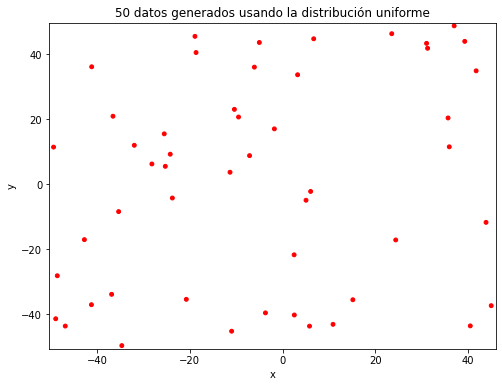


--- Pulsar tecla para continuar ---



In [9]:
# EJERCICIO 1.1: Dibujar una gráfica con la nube de puntos de salida correspondiente

x = generate_uniform_data(50, 2, [-50,50])

x = np.hstack((np.ones((50, 1)), x))
#def scatter(X, y = None, fz = None, title='Gráfico', axis_labels = ['x','y'],regions = False,label = "Clasificador"):
 
scatter(x,title= "50 datos generados usando la distribución uniforme")

wait()

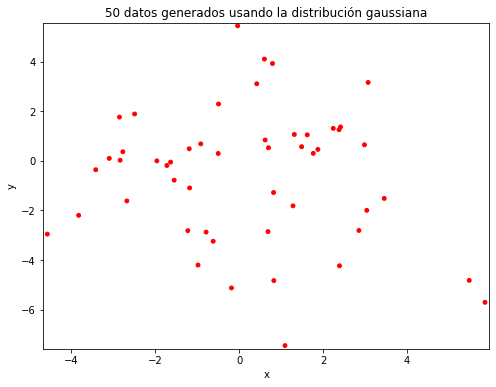


--- Pulsar tecla para continuar ---



In [10]:
x = generate_gaussian_data(50, 2, np.array([5,7]))
x = np.hstack((np.ones((50, 1)), x))
scatter(x,title= "50 datos generados usando la distribución gaussiana")


wait()

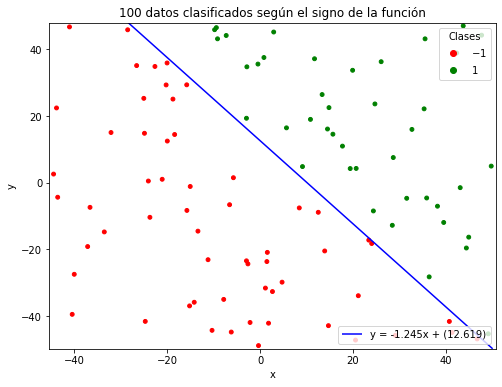


--- Pulsar tecla para continuar ---



In [11]:
###############################################################################
###############################################################################
###############################################################################


# EJERCICIO 1.2: Dibujar una gráfica con la nube de puntos de salida correspondiente


# La funcion np.sign(0) da 0, lo que nos puede dar problemas
def sign(x):
    if x >= 0:
        return 1
    return -1


def f(x, y, a, b):
    return sign(y - a*x - b)

    

# Generate data
X = generate_uniform_data(100,2,[-50,50])
a,b = generate_line([-50,50])
y = [f(x[0],x[1],a,b) for x in X]


X = np.hstack((np.ones((100, 1)), X))
# Inline function using a and b obtained by generate_line
line = lambda x,y: y-a*x-b

scatter(X,y,line,title= "100 datos clasificados según el signo de la función",label = "y = {:0.3f}x + ({:0.3f})".format(a, b))




wait()


# 1.2.b. Dibujar una gráfica donde los puntos muestren el resultado de su etiqueta, junto con la recta usada para ello
# Array con 10% de indices aleatorios para introducir ruido

#CODIGO DEL ESTUDIANTE

#wait()

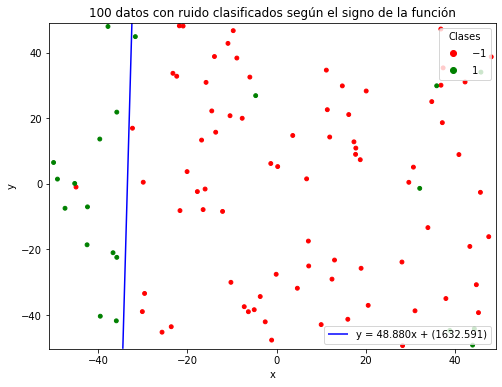


--- Pulsar tecla para continuar ---



In [12]:

# Function that generates noise on a percentage of the labels
def generate_noise(y,per = 0.1):
    
    y_copy = np.copy(y)
    
    for label in {-1,1}:
        # Get index of labels
        idx = np.where(y==label)[0]
        # Random selection of percentage*length labels
        changes = np.random.choice(idx,int(per*len(idx)),replace=False)
        # Change labels
        y_copy[changes] = -label
        
    return y_copy

X = generate_uniform_data(100,2,[-50,50])
a,b = generate_line([-50,50])
y = np.array([f(x[0],x[1],a,b) for x in X])

y_noise = generate_noise(y,0.1)  



X = np.hstack((np.ones((100, 1)), X))
# Inline function using a and b obtained by generate_line
line = lambda x,y: y-a*x-b

scatter(X,y_noise,line,title= "100 datos con ruido clasificados según el signo de la función",label = "y = {:0.3f}x + ({:0.3f})".format(a, b))
wait()



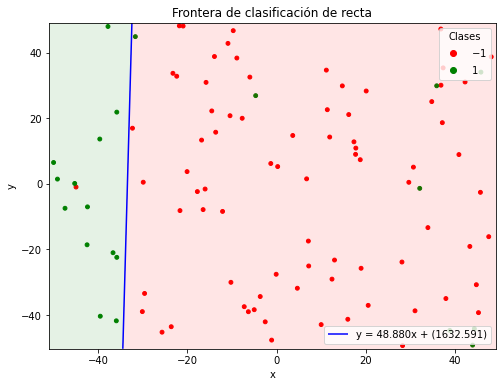

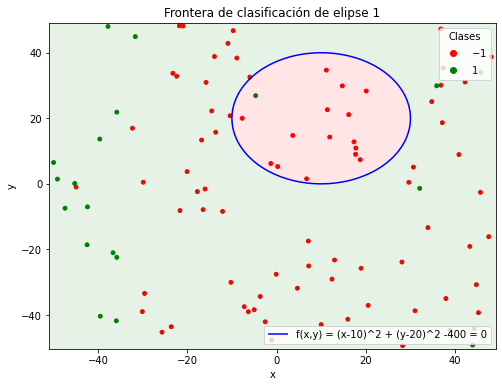

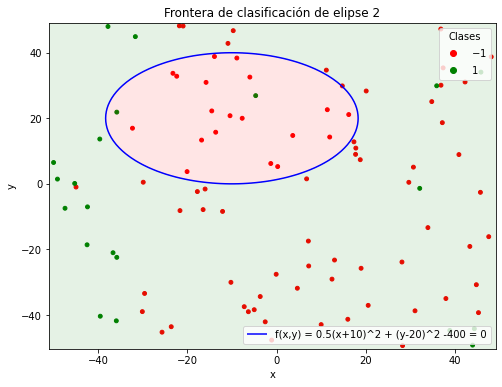

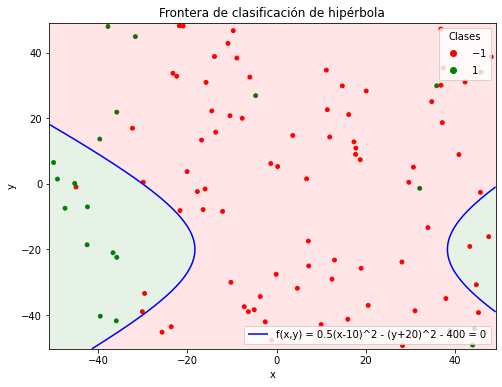

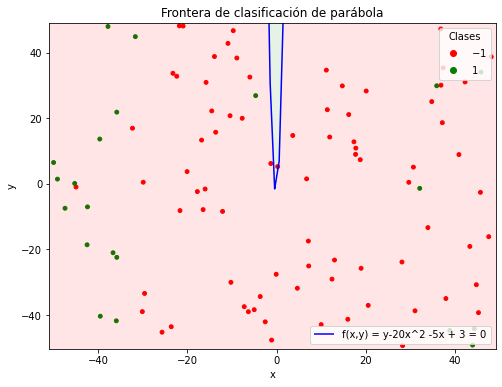


--- Pulsar tecla para continuar ---



In [17]:
###############################################################################
###############################################################################
###############################################################################

# EJERCICIO 1.3: Supongamos ahora que las siguientes funciones definen la frontera de clasificación de los puntos de la muestra en lugar de una recta
functions = [line,
             lambda x,y: (x-10)**2 + (y-20)**2 -400,
             lambda x,y: 0.5*(x+10)**2 + (y-20)**2 -400,
             lambda x,y: 0.5*(x-10)**2 - (y+20)**2 - 400,
             lambda x,y: y-20*x**2 -5*x + 3]
names = ["y = {:0.3f}x + ({:0.3f})".format(a,b),
         "f(x,y) = (x-10)^2 + (y-20)^2 -400 = 0",
         "f(x,y) = 0.5(x+10)^2 + (y-20)^2 -400 = 0",
         "f(x,y) = 0.5(x-10)^2 - (y+20)^2 - 400 = 0",
         "f(x,y) = y-20x^2 -5x + 3 = 0"]

geo_names = ["recta","elipse 1", "elipse 2", "hipérbola", "parábola"]


for func,name,geo_name in zip(functions,names,geo_names):
    scatter(X,y_noise,func,regions = True,title= "Frontera de clasificación de {}".format(geo_name),label = name)

    

wait()



In [18]:
# MonkaS

In [ ]:
###############################################################################
###############################################################################
###############################################################################

# EJERCICIO 2.1: ALGORITMO PERCEPTRON

def ajusta_PLA(datos, label, max_iter, vini):
    #CODIGO DEL ESTUDIANTE
    
    return ?  

#CODIGO DEL ESTUDIANTE

# Random initializations
iterations = []
for i in range(0,10):
    #CODIGO DEL ESTUDIANTE
    
print('Valor medio de iteraciones necesario para converger: {}'.format(np.mean(np.asarray(iterations))))

wait()

# Ahora con los datos del ejercicio 1.2.b

#CODIGO DEL ESTUDIANTE

wait()

In [ ]:
###############################################################################
###############################################################################
###############################################################################

# EJERCICIO 3: REGRESIÓN LOGÍSTICA CON STOCHASTIC GRADIENT DESCENT

def sgdRL(?):
    #CODIGO DEL ESTUDIANTE

    return w



#CODIGO DEL ESTUDIANTE

wait()
    


# Usar la muestra de datos etiquetada para encontrar nuestra solución g y estimar Eout
# usando para ello un número suficientemente grande de nuevas muestras (>999).


#CODIGO DEL ESTUDIANTE

wait()

In [ ]:
###############################################################################
###############################################################################
###############################################################################
#BONUS: Clasificación de Dígitos


# Funcion para leer los datos
def readData(file_x, file_y, digits, labels):
    # Leemos los ficheros
    datax = np.load(file_x)
    datay = np.load(file_y)
    y = []
    x = []
    # Solo guardamos los datos cuya clase sea la digits[0] o la digits[1]
    for i in range(0,datay.size):
        if datay[i] == digits[0] or datay[i] == digits[1]:
            if datay[i] == digits[0]:
                y.append(labels[0])
            else:
                y.append(labels[1])
            x.append(np.array([1, datax[i][0], datax[i][1]]))
            
    x = np.array(x, np.float64)
    y = np.array(y, np.float64)
    
    return x, y

# Lectura de los datos de entrenamiento
x, y = readData('datos/X_train.npy', 'datos/y_train.npy', [4,8], [-1,1])
# Lectura de los datos para el test
x_test, y_test = readData('datos/X_test.npy', 'datos/y_test.npy', [4,8], [-1,1])


#mostramos los datos
fig, ax = plt.subplots()
ax.plot(np.squeeze(x[np.where(y == -1),1]), np.squeeze(x[np.where(y == -1),2]), 'o', color='red', label='4')
ax.plot(np.squeeze(x[np.where(y == 1),1]), np.squeeze(x[np.where(y == 1),2]), 'o', color='blue', label='8')
ax.set(xlabel='Intensidad promedio', ylabel='Simetria', title='Digitos Manuscritos (TRAINING)')
ax.set_xlim((0, 1))
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(np.squeeze(x_test[np.where(y_test == -1),1]), np.squeeze(x_test[np.where(y_test == -1),2]), 'o', color='red', label='4')
ax.plot(np.squeeze(x_test[np.where(y_test == 1),1]), np.squeeze(x_test[np.where(y_test == 1),2]), 'o', color='blue', label='8')
ax.set(xlabel='Intensidad promedio', ylabel='Simetria', title='Digitos Manuscritos (TEST)')
ax.set_xlim((0, 1))
plt.legend()
plt.show()

wait()

In [ ]:
#LINEAR REGRESSION FOR CLASSIFICATION 

#CODIGO DEL ESTUDIANTE


wait()

In [ ]:
#POCKET ALGORITHM
  
#CODIGO DEL ESTUDIANTE



wait()

In [3]:
#COTA SOBRE EL ERROR

#CODIGO DEL ESTUDIANTE